In [14]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from plotly.subplots import make_subplots
import seaborn as sns; sns.set_theme()#for heatmap

In [15]:
data= pd.read_csv('/Users/huiguo85/projects/python_projects/gene_expression_patient_conditions.csv',delimiter=',')

In [16]:
#data= pd.read_csv('/Users/huiguo85/projects/python_projects/Patient_POP_condition_exc_missingdata.csv',delimiter=',')

In [17]:
data.head(3)

,COLI,COLIII,MMP2,MMP8,MMP9,LOX,LOXL1,COLI/COLIII,POP_Stage,Age,...,Aa,Ba,C,gh,pb,tvl,Ap,Bp,D,POPQ_stage
0,11.856063,1.796686,8.417514,3.142830e-04,0.000166,0.567165,0.372906,6.598852,3,77,...,2,3,0.0,7.0,2.0,10.0,-1.0,-1.0,-3,3
1,4.504921,0.582785,2.594375,5.110000e-07,0.000155,0.258566,0.109733,7.729986,4,66,...,2,2,5.0,5.0,3.5,11.0,-1.0,-1.0,-1,3
2,6.881983,1.432735,5.359150,3.969560e-04,0.000238,0.377014,0.339216,4.803389,3,80,...,1,3,0.0,3.0,3.0,11.0,-1.0,-1.0,-5,3


In [18]:
data_nondiabetic= data.loc[data['Diabetic'] == "N"]
data_nondiabetic.head(3)

,COLI,COLIII,MMP2,MMP8,MMP9,LOX,LOXL1,COLI/COLIII,POP_Stage,Age,...,Aa,Ba,C,gh,pb,tvl,Ap,Bp,D,POPQ_stage
1,4.504921,0.582785,2.594375,5.110000e-07,0.000155,0.258566,0.109733,7.729986,4,66,...,2,2,5.0,5.0,3.5,11.0,-1.0,-1.0,-1,3
2,6.881983,1.432735,5.359150,3.969560e-04,0.000238,0.377014,0.339216,4.803389,3,80,...,1,3,0.0,3.0,3.0,11.0,-1.0,-1.0,-5,3
3,3.133017,1.000000,1.905299,6.620000e-06,0.000196,0.187346,0.087625,3.133017,0,45,...,-3,-3,-8.0,2.0,3.0,10.0,-3.0,-3.0,-10,0


In [19]:
fig = px.scatter_matrix(data_nondiabetic,
                       dimensions=["POP_Stage","Age","Parity","Aa","Ba","C","gh","pb","tvl","Ap","Bp","D","POPQ_stage"],
    
                       width=1000,
                       height=1000)
fig.data[0].diagonal.visible=False #remove diagnal data

fig.show()

In [20]:
tempdata=data[["POP_Stage","Age","Parity","Aa","Ba","C","gh","pb","tvl","Ap","Bp","D","POPQ_stage"]]

In [21]:
tempdata.head(3)

,POP_Stage,Age,Parity,Aa,Ba,C,gh,pb,tvl,Ap,Bp,D,POPQ_stage
0,3,77,4,2,3,0.0,7.0,2.0,10.0,-1.0,-1.0,-3,3
1,4,66,0,2,2,5.0,5.0,3.5,11.0,-1.0,-1.0,-1,3
2,3,80,2,1,3,0.0,3.0,3.0,11.0,-1.0,-1.0,-5,3


In [22]:
fig = px.scatter_matrix(data,
                       #dimensions=["COLI","COLIII","MMP2","MMP8","MMP9","LOX","LOXL1","COLI/COLIII","POP_Stage","Age","Parity","Aa","Ba","C","gh","pb","tvl","Ap","Bp","D","POPQ_stage"],
                       dimensions=["Aa","Ba","C","gh","pb","tvl","Ap","Bp","D","POPQ_stage"],
                        width=1000,
                       height=1000,
                       color="Diabetic",
                       color_discrete_sequence=["red", "blue"],
                       )
fig.data[0].diagonal.visible=False #remove diagnal data
fig.data[1].diagonal.visible=False #remove diagnal data
fig.show()

In [23]:
fig = px.scatter_matrix(data_nondiabetic,
                       dimensions=["COLI","COLIII","MMP2","MMP8","MMP9","LOX","LOXL1","COLI/COLIII","POP_Stage","Age","Parity","Aa","Ba","C","gh","pb","tvl","Ap","Bp","D","POPQ_stage"],
                       width=2000,
                       height=2000,
                       color="POPQ_stage",
                       color_continuous_scale=px.colors.sequential.Bluered,
                       )
fig.data[0].diagonal.visible=False #remove diagnal data
#fig.data[1].diagonal.visible=False #remove diagnal data
fig.show()

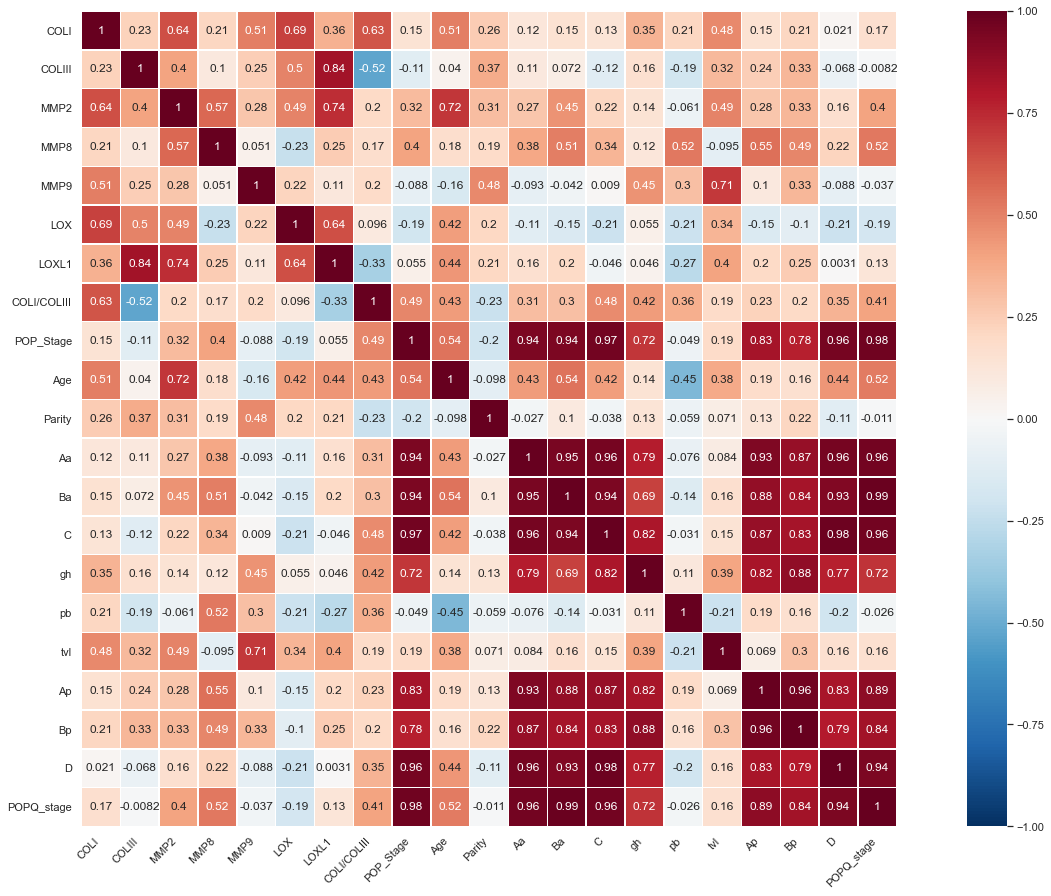

In [24]:
plt.subplots(figsize=(25,15))
corr = data_nondiabetic.corr()
ax = sns.heatmap(
    corr, 
    annot=True,
    vmin=-1, vmax=1, center=0,
    cmap="RdBu_r",
    #cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    linewidths=0.5,
   
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);